In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import random
import numpy as np

In [2]:
plt.rcParams["figure.dpi"] = 200

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods, following `sklearn` class conventions.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.
Return `self` after completing this process.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$th entry indicates which cluster center the $i$th row of $X$ is closest to.

Test your class on the iris data set (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data, coloring by cluster. It should look similar to the graphs in the lab.

In [19]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, p=2, normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
            p (float): The norm to use
            normalize (bool): Whether to normalize the centers at each step
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.p = p
        self.normalize = normalize
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        row_indices = set()
        clusters = {}
        distances = []
        
        while len(row_indices) != self.n_clusters:
            
            row_indices.add(random.randint(0, len(X) - 1))
        
        centers = [X[i] for i in row_indices]
        old_centers = [X[i] for i in row_indices]
        
        for j,i in enumerate(row_indices):
            clusters[j] = [X[i]]
        
        for i in range(self.max_iter):
#             assign each data point to the closest cluster

            for row in X:
                distances.clear()
            
                for center in centers:
                    
                    dif = center - row     # find the difference vector
                    distance = np.linalg.norm(dif, ord = self.p)
                    distances.append(distance) # this is the distance from the row to the ith center
                        
                min_distance = distances[0] #after all distances have been computed, set the first as the minimum
                closest = 0
                for i in range(len(distances)):    # iterate through the distances, and save the key of the smallest distance

                    if distances[i] < min_distance:
                        
                        closest = i   #that key will correlate with the closest center
                        min_distance = distances[i]
                        
                clusters[closest] += [row]  # add the row to that closest cluster

#             recompute the cluster centers as the means of the new clusters
            for i in range(len(centers)):
                old_centers[i] = centers[i]
                centers[i] = sum(clusters[i]) / len(clusters[i])
            
            if self.normalize:
                centers = [center / np.linalg.norm(center) for center in centers]
                
            
#             if the old clusters and new clusters are sufficiently close, terminate
            
            for i in range(len(centers)):
                
                if np.linalg.norm(old_centers[i] - centers[i]) < self.tol:
                    stop = True
                else:
                    stop = False
                    break
                        
            if stop:
                break
        
        self.centers = centers
                        
                        

                
            
        return self

    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters-1 for each entry of X.
        """
        distances = []
        closest_center = []
        
        for row in X:
            distances.clear()
            for center in self.centers:

                dif = center - row     # find the difference vector
                distance = np.linalg.norm(dif, ord = self.p)
                distances.append(distance) # this is the distance from the row to the ith center

            min_distance = distances[0] #after all distances have been computed, set the first as the minimum
            closest = 0
    
            for i in range(len(distances)):    # iterate through the distances, and save the key of the smallest distance

                    if distances[i] < min_distance:
                        
                        closest = i
                        min_distance = distances[closest]
                        
            closest_center.append(closest)
            
        return closest_center
        
    def fit_predict(self, X, y=None):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)

In [4]:
#run this cell to get the iris data
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = PCA(n_components=2).fit_transform(iris.data)


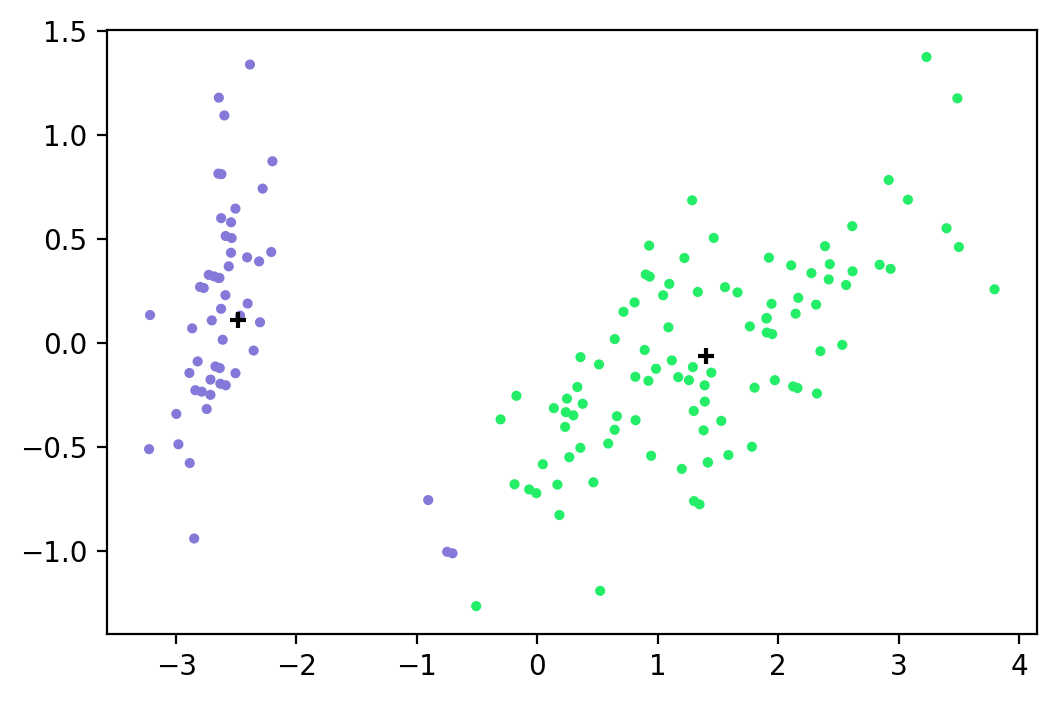

In [5]:
clusterAlg = KMeans(2) # run the KMeans with two cluster centers

#get the labels and the centers
labels = clusterAlg.fit_predict(iris_data)

centers = np.array(clusterAlg.centers)

# grab the x and y values for each data point
x_values = iris_data.transpose()[0]
y_values = iris_data.transpose()[1]

#assign each cluster a random color, and plot the clusters
colormap = np.array([np.random.rand(3,) for i in range(0, clusterAlg.n_clusters)])
plt.scatter(x_values, y_values,s=7, c=colormap[labels])
plt.scatter(centers[:,0], centers[:,1], marker='+', c='k')
plt.show()


## Problem 2

Modify `KMeansfit()` to take in a paramter `p` which gives us the norm to be used. 

Import and parse the Sacramento housing data.
1. Use your `KMeans` class with a chosen `norm` on the housing data, let n=12.
2. Experiment with different norms.
3. Plot the data, coloring by cluster.
Also mark the cluster centers.
In a Markdown cell explain which norm is best for decreasing the longest distance to farthest home.

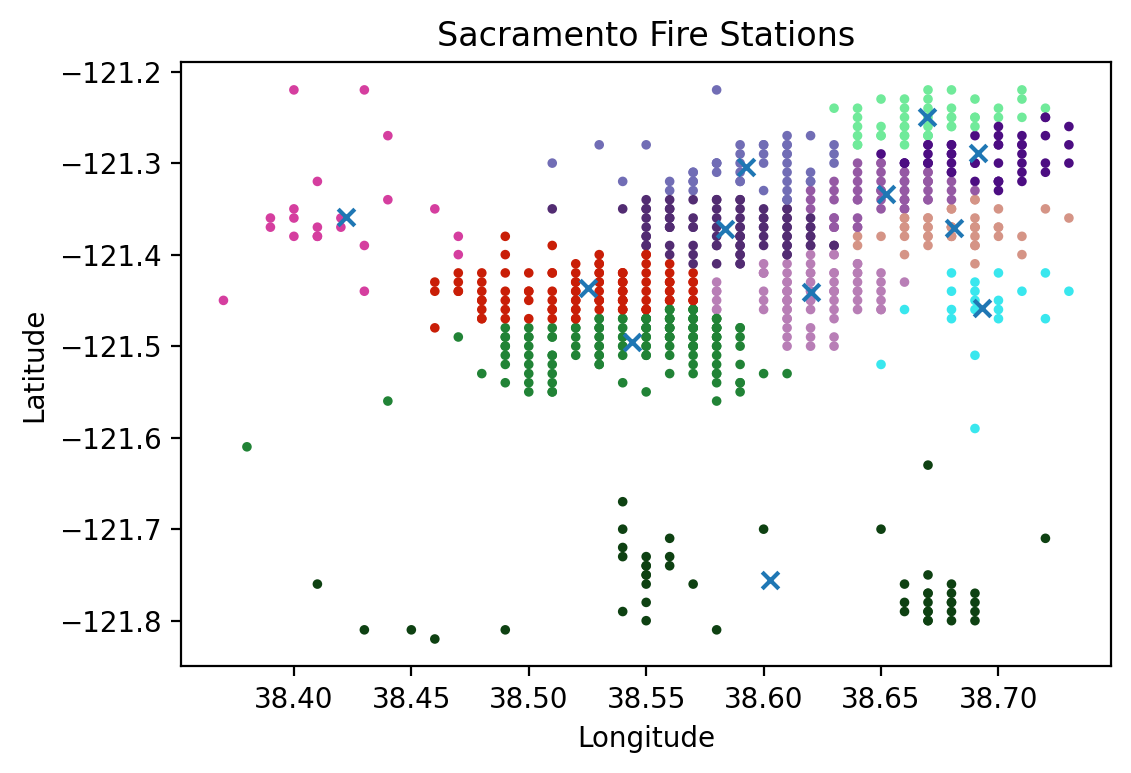

In [6]:
sacramento_data = np.load('sacramento.npy')


# print(sacramento_data)
clusterAlg = KMeans(12,p=2) # run the KMeans with twelve cluster centers

#get the labels and the centers
labels = clusterAlg.fit_predict(sacramento_data[:,6:])
centers = np.array(clusterAlg.centers)

# grab the latitudes and longitudes for each data point
x_values = sacramento_data[:,6]
y_values = sacramento_data[:,7]

#assign each cluster a random color, and plot the clusters
colormap = np.array([np.random.rand(3,) for i in range(0, clusterAlg.n_clusters)])
plt.scatter(x_values, y_values, c=colormap[labels], s=6)
plt.scatter(centers[:,0], centers[:,1], marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sacramento Fire Stations')

plt.show()

The 2-norm appears to minimize the furthest distance, as the 2-norm is the distance as the crow flies.

## Problem 3

Modify `KMeans.fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful.)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

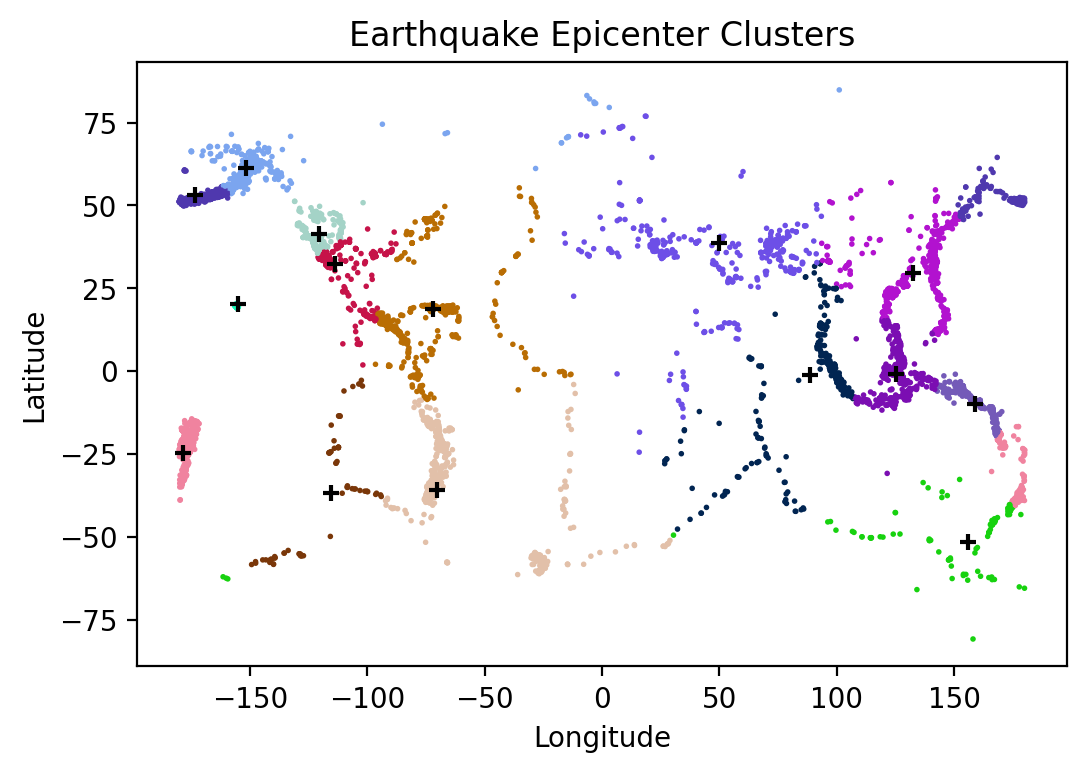

In [22]:
quake_data = np.load('earthquake_coordinates.npy')

#convert the latitude/longitude to spherical coordinates
theta = [np.deg2rad(longitude) for longitude in quake_data.transpose()[0]]
phi = [np.deg2rad(90 - latitude) for latitude in quake_data.transpose()[1]]

#convert the spherical coordinates to euclidean
x = [np.sin(phi[i])*np.cos(theta[i]) for i in range(len(theta))]
y = [np.sin(phi[i])*np.sin(theta[i]) for i in range(len(theta))]
z = [np.cos(phi[i]) for i in range(len(theta))]

#combine the coordinates into a numpy array
quake_euclid = np.array([[x[i],y[i],z[i]] for i in range(len(theta))])

#create the KMeans object
quake_clusters = KMeans(15, normalize=True)

#run the fitpredict to get the centers and the labels for each point
labels = quake_clusters.fit_predict(quake_euclid)
centers = quake_clusters.centers

# convert the coordinates of the centers to spherical
phis = [np.arccos(center[2]) for center in centers]
thetas = [np.arctan2(centers[i][1],centers[i][0]) for i in range(len(centers))]

# convert the spherical angles of the centers to latitudes and longitudes
latitudes = [90 - np.rad2deg(phi) for phi in phis]
longitudes = [np.rad2deg(theta) for theta in thetas]

# plot the epicenters and earthquake stuff

colormap = np.array([np.random.rand(3,) for i in range(0, quake_clusters.n_clusters)])

plt.scatter(quake_data[:,0], quake_data[:,1], c=colormap[labels], s=1)
plt.scatter(longitudes, latitudes, marker='+', c='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Epicenter Clusters')

plt.show()

## Problem 4

Write a function that accepts an image array (of shape $(m,n,3)$), an integer number of clusters $k$, and an integer number of samples $S$.
Reshape the image so that each row represents a single pixel.
Choose $S$ pixels to train a $k$-means model on with $k$ clusters.
Make a copy of the original picture where each pixel has the same color as its cluster center.
Return the new image.
For this problem, you may use `sklearn.cluster.KMeans` instead of your `KMeans` class.

Test your function on some of the provided NASA images.

In [ ]:
def quantize_image(im, n_clusters=4, n_samples=50):
    """Cluster the pixels of the image 'im' by color.
    Return a copy of the image where each pixel is replaced by the value
    of its cluster center.
    
    Parameters:
        im ((m,n,3) ndarray): an image array.
        n_clusters (int): the number of k-means clusters.
        n_samples (int): the number of pixels to train the k-means model on.
    
    Returns:
        ((m,n,3) ndarray): the quantized image.
    """
    raise NotImplementedError("Problem 4 Incomplete")